Import Library

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

from google.colab import drive

Mounting Google Drive Folder & Define Dataset Path

In [0]:
drive.mount('/content/gdrive/')
dataset = '/content/gdrive/My Drive/KP_Malaria_Cells_Classifications/malaria_cells_dataset/'  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


#### Load Dataset

In [0]:
data = ImageDataBunch.from_folder(dataset, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

Checking data classes & looking for some images from dataset

Classes: 
 ['Parasitized', 'Uninfected']


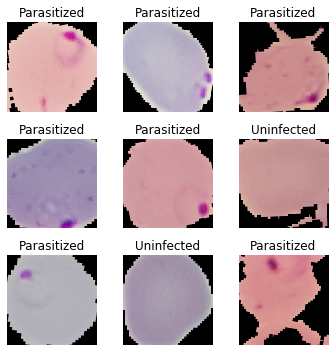

In [0]:
print(f'Classes: \n {data.classes}')
data.show_batch(rows=3, figsize=(5,5))

## RestNet34 Model

Creating RestNet34 Model

In [0]:
learn_rn34 = cnn_learner(data, models.resnet34, metrics=accuracy)

Finding good learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 1.00E-02


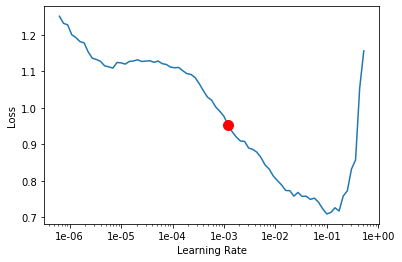

In [0]:
learn_rn34.lr_find()
learn_rn34.recorder.plot(suggestion=True)
min_grad_lr = learn_rn34.recorder.min_grad_lr

Train Model

In [0]:
learn_rn34.fit_one_cycle(6) # sebelum pakai learning rate

epoch,train_loss,valid_loss,accuracy,time
0,0.200784,0.137521,0.956088,3:33:18
1,0.143947,0.120997,0.960443,08:32
2,0.136632,0.116447,0.959717,08:21
3,0.122206,0.092430,0.967520,08:21
4,0.103203,0.081540,0.969697,08:09
5,0.087640,0.076774,0.971874,08:01


In [0]:
learn_rn34.fit_one_cycle(6,min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.256096,0.178317,0.943205,2:24:24
1,0.161749,0.122655,0.955906,04:59
2,0.112442,0.123406,0.957177,04:44
3,0.126159,0.101654,0.960261,04:47
4,0.100979,0.100296,0.961350,05:02
5,0.104610,0.097110,0.962257,05:29


In [0]:
learn_rn34.fit_one_cycle(20,min_grad_lr) # masih penasaran dengan train_loss & validation_loss yg semakin turun, cobain 20 epochs

epoch,train_loss,valid_loss,accuracy,time
0,0.097579,0.096935,0.961350,05:27
1,0.103330,0.096782,0.962257,05:25
2,0.103947,0.098563,0.963890,05:30
3,0.115044,0.095885,0.963709,05:28
4,0.116694,0.100538,0.961350,05:23
5,0.109189,0.096015,0.965523,05:28
6,0.108713,0.101397,0.963890,05:24
7,0.100933,0.099443,0.963346,05:13
8,0.103347,0.103413,0.964253,05:18
9,0.090648,0.100507,0.962620,05:17


Save Model 

In [0]:
learn_rn34.save('md-restnet34-962257')

Load Trained Model

In [0]:
trained_model_path = '/content/gdrive/My Drive/KP_Malaria_Cells_Classifications/malaria_cells_dataset/models/md-restnet34-962257'
trained_rn34 = cnn_learner(data,models.resnet34,metrics=accuracy)
trained_rn34.load(trained_model_path)

RuntimeError: ignored

Predicting random image from dataset using trained model